## Step 1
Reading MTA turnstile data and creating dictionary

In [21]:
import pandas as pd
import datetime
import pprint

In [22]:
mta = pd.read_csv("turnstile_160109.txt")

## Shorten data to 5000 rows for quicker testing
mta = mta.head(5000)

#print(mta.head(10))

In [23]:
## Create key and initiate dictionary
mta['key'] = zip(mta['C/A'], mta['UNIT'], mta['SCP'], mta['STATION'])
mta_dict = {}

In [24]:
## Loop each row in mta list and add its key and value into dictionary mta_dict
for index, row in mta.iterrows():
    value = row[4:11].tolist()
    key = row['key']
    #print key, value
    
    if key in mta_dict:
        mta_dict[key].append(value)
        
    else:
        mta_dict[key] = [value]
        
pprint.pprint(mta_dict, width=100)

{('A002', 'R051', '02-00-00', '59 ST'): [['NQR456',
                                          'BMT',
                                          '01/02/2016',
                                          '03:00:00',
                                          'REGULAR',
                                          5478180,
                                          1849152],
                                         ['NQR456',
                                          'BMT',
                                          '01/02/2016',
                                          '07:00:00',
                                          'REGULAR',
                                          5478183,
                                          1849161],
                                         ['NQR456',
                                          'BMT',
                                          '01/02/2016',
                                          '11:00:00',
                                          'REGULAR',
  

## Step 2 
Create datetime series in dictionary

In [25]:
## Create new datetime column
mta['datetime'] = pd.to_datetime(mta.DATE + mta.TIME, format='%m/%d/%Y%H:%M:%S')
#mta

In [26]:
datetime_dict = {}

## Loop through each....
for index, row in mta.iterrows():
    value = row['datetime'], row['ENTRIES']
    key = row['key']
    #print key, value
    
    if key in datetime_dict:
        datetime_dict[key].append(value)
        
    else:
        datetime_dict[key] = [value]
        
# pprint.pprint(datetime_dict)

## Step 3 
Count daily entries

In [27]:
## count_day function takes a list of DateTime objects with the turnstile counter and calculates each day's entries
## and returns a list of [(date, count)]

def count_day(my_list):
    ## Get unique values of dates
    dates = [row[0].date() for row in my_list]
    dates = set(dates)
    #print dates
    
    result = []
    for date in dates:
        entries = [x[1] for x in my_list if x[0].date() == date]
        result.append((date, max(entries)-min(entries)))
    
    return result
    #print result
    
    
#print count_day(datetime_dict[('A002', 'R051', '02-00-00', '59 ST')])    


In [28]:
count_dict = {key:count_day(datetime_dict[key]) for key in datetime_dict}
pprint.pprint(count_dict, width = 100)

{('A002', 'R051', '02-00-00', '59 ST'): [(datetime.date(2016, 1, 4), 1733),
                                         (datetime.date(2016, 1, 5), 1596),
                                         (datetime.date(2016, 1, 8), 1853),
                                         (datetime.date(2016, 1, 2), 1033),
                                         (datetime.date(2016, 1, 3), 737),
                                         (datetime.date(2016, 1, 6), 1733),
                                         (datetime.date(2016, 1, 7), 1783)],
 ('A002', 'R051', '02-00-01', '59 ST'): [(datetime.date(2016, 1, 4), 1508),
                                         (datetime.date(2016, 1, 5), 1423),
                                         (datetime.date(2016, 1, 8), 1489),
                                         (datetime.date(2016, 1, 2), 904),
                                         (datetime.date(2016, 1, 3), 669),
                                         (datetime.date(2016, 1, 6), 1459),
              

-------- Part 4 ---------

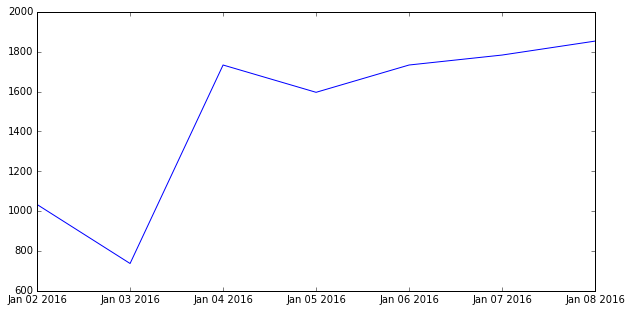

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# If I just plot one turnstile (making sure to sort by date)
my_turnstile = sorted(count_dict[('A002', 'R051', '02-00-00', '59 ST')])

dates = [x[0] for x in my_turnstile]
counts = [x[1] for x in my_turnstile]

plt.figure(figsize=(10,5))
plt.plot(dates, counts)